Importing packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Target-US counties cases, could use to grab how our state compares to other local states and states we are trying to emulate. link- https://www.kaggle.com/fireballbyedimyrnmom/us-counties-covid-19-dataset , http://coronavirusapi.com

problem definition - using county cases to show how we comp to other citys similar to ours and how as a state we comp to other state we are similar to 

In [2]:
c_df = pd.read_csv('/content/drive/My Drive/COVID19 Capstone/us-counties.csv')
print(c_df.shape)
print(c_df.columns)
c_df.head()

(48509, 6)
Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')


,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [0]:
c_df['date'] = pd.to_datetime(c_df['date'])

### albuquerque metro area dfs

In [4]:
nm_df = c_df[c_df['state']=='New Mexico']
print(nm_df.shape)
nm_df.head()

(435, 6)


,date,county,state,fips,cases,deaths
1280,2020-03-11,Bernalillo,New Mexico,35001.0,1,0
1281,2020-03-11,Santa Fe,New Mexico,35049.0,1,0
1282,2020-03-11,Socorro,New Mexico,35053.0,2,0
1512,2020-03-12,Bernalillo,New Mexico,35001.0,2,0
1513,2020-03-12,Santa Fe,New Mexico,35049.0,2,0


In [5]:
print(nm_df.county.unique())

['Bernalillo' 'Santa Fe' 'Socorro' 'Sandoval' 'Taos' 'San Miguel'
 'Doña Ana' 'McKinley' 'Lea' 'San Juan' 'Chaves' 'Cibola' 'Curry' 'Eddy'
 'Rio Arriba' 'Roosevelt' 'Valencia' 'Torrance' 'Catron' 'Grant' 'Otero'
 'Unknown' 'Lincoln' 'Los Alamos' 'Colfax' 'Hidalgo' 'Luna']


In [6]:
abq_df = nm_df[nm_df['county'].str.contains('Bernalillo')].copy(deep=True)
san_df = nm_df[nm_df['county'].str.contains('Sandoval')].copy(deep=True)
tor_df = nm_df[nm_df['county'].str.contains('Torrance')].copy(deep=True)
val_df = nm_df[nm_df['county'].str.contains('Valencia')].copy(deep=True)
print(abq_df.shape)
print(san_df.shape)
print(tor_df.shape)
print(val_df.shape)

(31, 6)
(28, 6)
(12, 6)
(15, 6)


Converting date column to datetime format

In [7]:
print(abq_df.dtypes)
abq_df.head()

date      datetime64[ns]
county            object
state             object
fips             float64
cases              int64
deaths             int64
dtype: object


,date,county,state,fips,cases,deaths
1280,2020-03-11,Bernalillo,New Mexico,35001.0,1,0
1512,2020-03-12,Bernalillo,New Mexico,35001.0,2,0
1805,2020-03-13,Bernalillo,New Mexico,35001.0,5,0
2152,2020-03-14,Bernalillo,New Mexico,35001.0,6,0
2560,2020-03-15,Bernalillo,New Mexico,35001.0,10,0


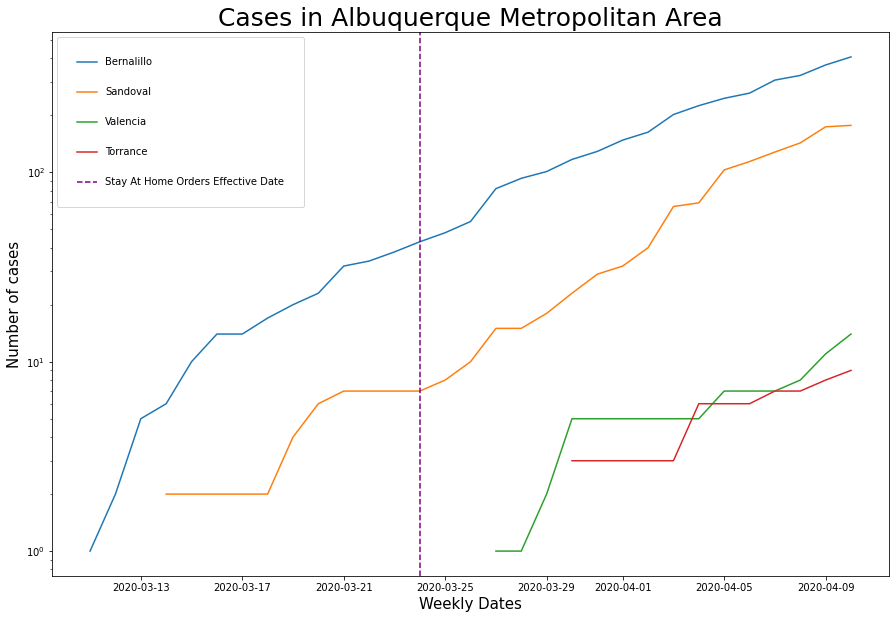

In [8]:
plt.figure(figsize=[15,10])

bern = plt.plot(abq_df['date'],abq_df['cases'], label= 'Bernalillo', )
san = plt.plot(san_df['date'],san_df['cases'], label= 'Sandoval')
val = plt.plot(val_df['date'],val_df['cases'], label= 'Valencia')
tor = plt.plot(tor_df['date'],tor_df['cases'], label= 'Torrance')

plt.yscale('log')
plt.xlabel('Weekly Dates', fontsize=15)
plt.ylabel('Number of cases', fontsize=15)
plt.title('Cases in Albuquerque Metropolitan Area', fontsize=25)
plt.axvline(pd.to_datetime('2020-3-24'), color='purple', linestyle= '--', label='Stay At Home Orders Effective Date')
plt.legend(borderpad=2, labelspacing=2,fontsize=10);

### Arizona metro data

In [9]:
ariz_df = c_df[c_df['state']=='Arizona']
print(ariz_df.shape)
ariz_df.head()

(396, 6)


,date,county,state,fips,cases,deaths
8,2020-01-26,Maricopa,Arizona,4013.0,1,0
13,2020-01-27,Maricopa,Arizona,4013.0,1,0
18,2020-01-28,Maricopa,Arizona,4013.0,1,0
23,2020-01-29,Maricopa,Arizona,4013.0,1,0
28,2020-01-30,Maricopa,Arizona,4013.0,1,0


In [10]:
print(ariz_df.county.unique())
# print(ariz_df.date.unique())

['Maricopa' 'Pinal' 'Pima' 'Graham' 'Navajo' 'Coconino' 'Santa Cruz'
 'Yavapai' 'Yuma' 'Apache' 'Cochise' 'La Paz' 'Mohave' 'Gila' 'Greenlee'
 'Unknown']


phoneix metropolitan area

In [11]:
mari_df = ariz_df[ariz_df['county'].str.contains('Maricopa')].copy(deep=True)
pinal_df = ariz_df[ariz_df['county'].str.contains('Pinal')].copy(deep=True)
print(mari_df.shape)
print(pinal_df.shape)

(76, 6)
(36, 6)


In [0]:
# mari_df['date'] = pd.to_datetime(mari_df['date'])
# pinal_df['date'] = pd.to_datetime(pinal_df['date'])

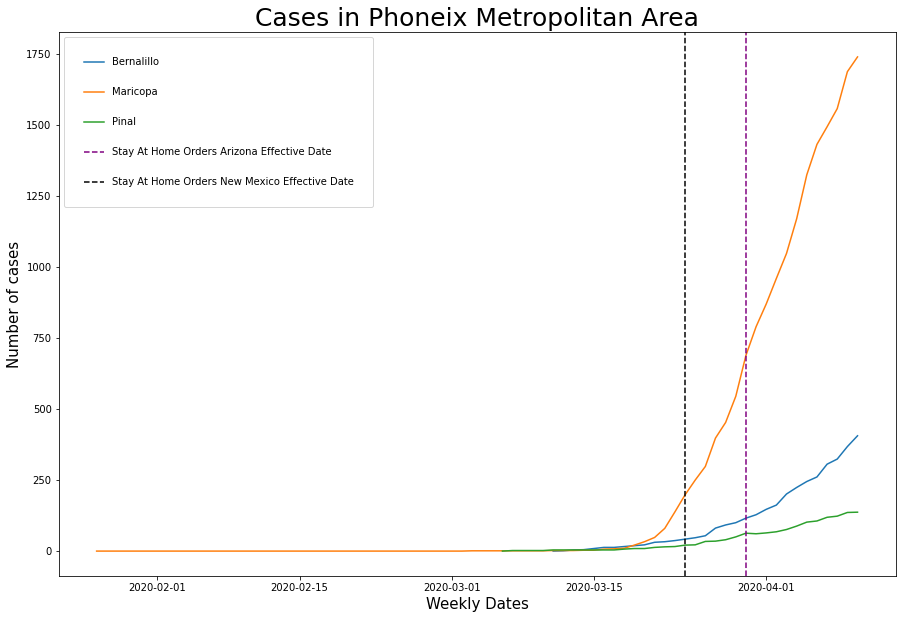

In [13]:
plt.figure(figsize=[15,10])

bern = plt.plot(abq_df['date'],abq_df['cases'], label= 'Bernalillo')
mari = plt.plot(mari_df['date'],mari_df['cases'], label= 'Maricopa')
pinal = plt.plot(pinal_df['date'],pinal_df['cases'], label= 'Pinal')

#plt.yscale('log')
plt.xlabel('Weekly Dates', fontsize=15)
plt.ylabel('Number of cases', fontsize=15)
plt.title('Cases in Phoneix Metropolitan Area', fontsize=25)
plt.axvline(pd.to_datetime('2020-3-30'), color='purple', linestyle= '--', label='Stay At Home Orders Arizona Effective Date')
plt.axvline(pd.to_datetime('2020-3-24'), color='black', linestyle= '--', label='Stay At Home Orders New Mexico Effective Date')
plt.legend(borderpad=2, labelspacing=2,fontsize=10);

## County population Df grab our county populations so we can compare us to other states . link-https://www.census.gov/data/datasets/time-series/demo/popest/2010s-counties-detail.html#

problem deifinition - the county pop from 2010 to 2016 from the census can use to show a progression of the population and maybe pair it with the amount of hospitals to show how we must progress our infrastructure to keep up with albuquerques pop growth. 

In [0]:
county_df = pd.read_csv('/content/drive/My Drive/COVID19 Capstone/PEP_2018_PEPAGESEX.csv', encoding = 'ISO-8859-1', skiprows=[0])

In [15]:
county_df.head()

,Id,Id2,Geography,"April 1, 2010 - Census - Both Sexes; Total","April 1, 2010 - Census - Male; Total","April 1, 2010 - Census - Female; Total","April 1, 2010 - Estimates Base - Both Sexes; Total","April 1, 2010 - Estimates Base - Male; Total","April 1, 2010 - Estimates Base - Female; Total",Population Estimate (as of July 1) - 2010 - Both Sexes; Total,Population Estimate (as of July 1) - 2010 - Male; Total,Population Estimate (as of July 1) - 2010 - Female; Total,Population Estimate (as of July 1) - 2011 - Both Sexes; Total,Population Estimate (as of July 1) - 2011 - Male; Total,Population Estimate (as of July 1) - 2011 - Female; Total,Population Estimate (as of July 1) - 2012 - Both Sexes; Total,Population Estimate (as of July 1) - 2012 - Male; Total,Population Estimate (as of July 1) - 2012 - Female; Total,Population Estimate (as of July 1) - 2013 - Both Sexes; Total,Population Estimate (as of July 1) - 2013 - Male; Total,Population Estimate (as of July 1) - 2013 - Female; Total,Population Estimate (as of July 1) - 2014 - Both Sexes; Total,Population Estimate (as of July 1) - 2014 - Male; Total,Population Estimate (as of July 1) - 2014 - Females; Total,Population Estimate (as of July 1) - 2015 - Both Sexes; Total,Population Estimate (as of July 1) - 2015 - Male; Total,Population Estimate (as of July 1) - 2015 - Female; Total,Population Estimate (as of July 1) - 2016 - Both Sexes; Total,Population Estimate (as of July 1) - 2016 - Male; Total,Population Estimate (as of July 1) - 2016 - Female; Total,Population Estimate (as of July 1) - 2017 - Both Sexes; Total,Population Estimate (as of July 1) - 2017 - Male; Total,Population Estimate (as of July 1) - 2017 - Female; Total,Population Estimate (as of July 1) - 2018 - Both Sexes; Total,Population Estimate (as of July 1) - 2018 - Male; Total,Population Estimate (as of July 1) - 2018 - Female; Total,"April 1, 2010 - Census - Both Sexes; Total - Under 5 years","April 1, 2010 - Census - Male; Total - Under 5 years","April 1, 2010 - Census - Female; Total - Under 5 years","April 1, 2010 - Estimates Base - Both Sexes; Total - Under 5 years",...,Population Estimate (as of July 1) - 2016 - Female; 15 to 44 years,Population Estimate (as of July 1) - 2017 - Both Sexes; 15 to 44 years,Population Estimate (as of July 1) - 2017 - Male; 15 to 44 years,Population Estimate (as of July 1) - 2017 - Female; 15 to 44 years,Population Estimate (as of July 1) - 2018 - Both Sexes; 15 to 44 years,Population Estimate (as of July 1) - 2018 - Male; 15 to 44 years,Population Estimate (as of July 1) - 2018 - Female; 15 to 44 years,"April 1, 2010 - Census - Both Sexes; Median age (years)","April 1, 2010 - Census - Male; Median age (years)","April 1, 2010 - Census - Female; Median age (years)","April 1, 2010 - Estimates Base - Both Sexes; Median age (years)","April 1, 2010 - Estimates Base - Male; Median age (years)","April 1, 2010 - Estimates Base - Female; Median age (years)",Population Estimate (as of July 1) - 2010 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2010 - Male; Median age (years),Population Estimate (as of July 1) - 2010 - Female; Median age (years),Population Estimate (as of July 1) - 2011 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2011 - Male; Median age (years),Population Estimate (as of July 1) - 2011 - Female; Median age (years),Population Estimate (as of July 1) - 2012 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2012 - Male; Median age (years),Population Estimate (as of July 1) - 2012 - Female; Median age (years),Population Estimate (as of July 1) - 2013 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2013 - Male; Median age (years),Population Estimate (as of July 1) - 2013 - Female; Median age (years),Population Estimate (as of July 1) - 2014 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2014 - Male; Median age (years),Population Estimate (as of July 1) - 2014 - Fema

In [0]:
nm_county_df = county_df[county_df['Geography'].str.contains('New Mexico')]
ariz_county_df = county_df[county_df['Geography'].str.contains('Arizona')]

In [17]:
print(nm_county_df.shape)
print(ariz_county_df.shape)

(33, 1092)
(15, 1092)


In [0]:
nm_county_pop = nm_county_df[['Geography','Population Estimate (as of July 1) - 2018 - Both Sexes; Total',
                              'Population Estimate (as of July 1) - 2018 - Male; Total', 
                              'Population Estimate (as of July 1) - 2018 - Female; Total']].copy(deep=True)
nm_county_df.reset_index(inplace=True, drop=True)

In [19]:
nm_county_pop.head()

,Geography,Population Estimate (as of July 1) - 2018 - Both Sexes; Total,Population Estimate (as of July 1) - 2018 - Male; Total,Population Estimate (as of July 1) - 2018 - Female; Total
1795,"Bernalillo County, New Mexico",678701,332972,345729
1796,"Catron County, New Mexico",3578,1889,1689
1797,"Chaves County, New Mexico",64689,32098,32591
1798,"Cibola County, New Mexico",26746,13666,13080
1799,"Colfax County, New Mexico",12110,6142,5968


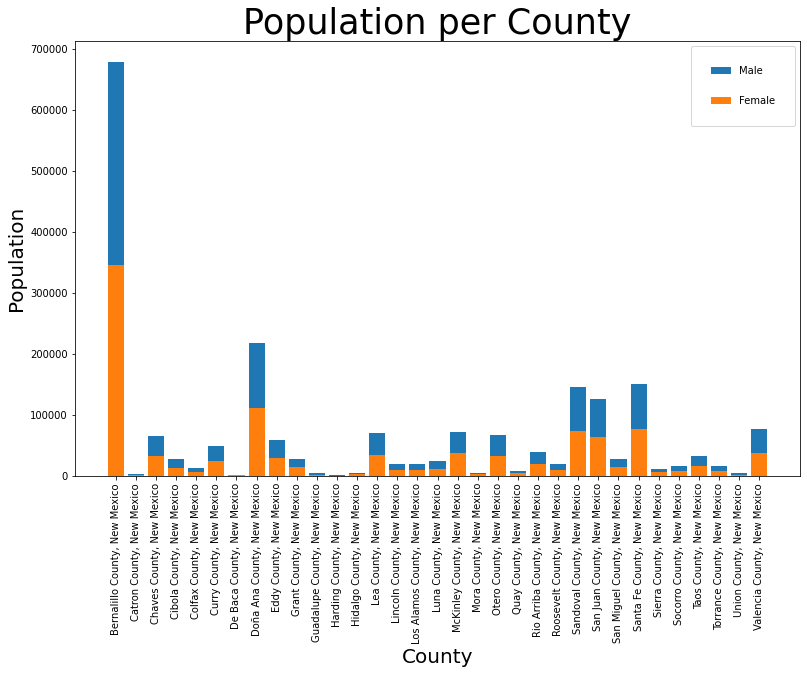

In [20]:
plt.figure(figsize=[13,8])
plt.bar(nm_county_pop['Geography'],nm_county_pop['Population Estimate (as of July 1) - 2018 - Both Sexes; Total'],label='Male')
#plt.bar(nm_county_pop['Geography'],nm_county_pop['Population Estimate (as of July 1) - 2018 - Male; Total'])
plt.bar(nm_county_pop['Geography'],nm_county_pop['Population Estimate (as of July 1) - 2018 - Female; Total'], label='Female')
plt.xticks(rotation=90)
plt.ylabel('Population', fontsize=20)
plt.xlabel('County', fontsize=20)
plt.title('Population per County',fontsize=35)
plt.legend(borderpad=2, labelspacing=2,fontsize=10);

## Stay at home orders timeline.  link-https://www.kff.org/coronavirus-policy-watch/stay-at-home-orders-to-fight-covid19/

problem defintion- using the stay at home orders with other columns to possibly create a ranking sytem to show where albuquerque lands on reaction time of SAH order.

In [0]:
sah_df = pd.read_excel('/content/drive/My Drive/COVID19 Capstone/Statewide-Stay-at-Home-Orders.xlsx', skiprows=[0,1])

In [22]:
sah_df.head()

,State,Date Announced,Effective Date
0,Alabama,April 3,April 4
1,Alaska,March 27,March 28
2,Arizona,March 30,March 31
3,Arkansas,-,-
4,California,March 19,March 19


In [0]:
#sah_df.sort_values('Effective Date',ascending=True)

In [24]:
sah_df.dtypes

State             object
Date Announced    object
Effective Date    object
dtype: object

In [0]:
import datetime

In [0]:
sah_df['Date Announced'] = pd.to_datetime('2020 ' + sah_df['Date Announced'].astype(str), format=('%Y %B %d'), errors='coerce')

In [0]:
sah_df['Effective Date'] = pd.to_datetime('2020 ' + sah_df['Effective Date'].astype(str), format=('%Y %B %d'), errors='coerce')

In [28]:
sah_df.head()

,State,Date Announced,Effective Date
0,Alabama,2020-04-03,2020-04-04
1,Alaska,2020-03-27,2020-03-28
2,Arizona,2020-03-30,2020-03-31
3,Arkansas,NaT,NaT
4,California,2020-03-19,2020-03-19


In [0]:
# sah_df.fillna(value='None', inplace=True)

In [0]:
import matplotlib.dates as mdates

## State population Data - https://worldpopulationreview.com/states/

problem definition - the pop of states to use in the measurements 

In [0]:
pop_df = pd.read_csv('/content/drive/My Drive/COVID19 Capstone/State_Pop_Data.csv')

In [0]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    #'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    #'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    #'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

# thank you to @kinghelix and @trevormarburger for this idea
abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))


In [0]:
pop_df.index = pop_df['State']

In [34]:
pop_df.head()

,rank,State,Pop,Growth,Pop2018,Pop2010,growthSince2010,Percent,density
State,,,,,,,,,
California,1,California,39937489,0.0096,39557045,37320903,0.0701,0.1194,256.3727
Texas,2,Texas,29472295,0.0268,28701845,25242679,0.1676,0.0881,112.8204
Florida,3,Florida,21992985,0.0326,21299325,18845785,0.1670,0.0658,410.1256
New York,4,New York,19440469,-0.0052,19542209,19400080,0.0021,0.0581,412.5211
Pennsylvania,5,Pennsylvania,12820878,0.0011,12807060,12711158,0.0086,0.0383,286.5449


In [0]:
state_abbrev_df =  pd.Series(us_state_abbrev)

In [36]:
state_abbrev_df.head()

Alabama       AL
Alaska        AK
Arizona       AZ
Arkansas      AR
California    CA
dtype: object

In [0]:
pop_df['state_abbrev'] = pd.Series(us_state_abbrev, index=pop_df.index)

In [38]:
pop_df.head()

,rank,State,Pop,Growth,Pop2018,Pop2010,growthSince2010,Percent,density,state_abbrev
State,,,,,,,,,,
California,1,California,39937489,0.0096,39557045,37320903,0.0701,0.1194,256.3727,CA
Texas,2,Texas,29472295,0.0268,28701845,25242679,0.1676,0.0881,112.8204,TX
Florida,3,Florida,21992985,0.0326,21299325,18845785,0.1670,0.0658,410.1256,FL
New York,4,New York,19440469,-0.0052,19542209,19400080,0.0021,0.0581,412.5211,NY
Pennsylvania,5,Pennsylvania,12820878,0.0011,12807060,12711158,0.0086,0.0383,286.5449,PA


## States covid cases vs pop density- https://worldpopulationreview.com/states/

In [39]:
cv_per_state = pd.read_csv('/content/drive/My Drive/COVID19 Capstone/states_covid.csv')
cv_per_state.head()

,"name,",tested,positive,deaths
0,AK,8664,293,9
1,AL,34077,4241,123
2,AR,22289,1599,34
3,AZ,45310,3962,142
4,CA,227600,24424,821


In [40]:
cv_per_state = cv_per_state.rename(columns={'name,':'state_abbrev'})
cv_per_state.head()

,state_abbrev,tested,positive,deaths
0,AK,8664,293,9
1,AL,34077,4241,123
2,AR,22289,1599,34
3,AZ,45310,3962,142
4,CA,227600,24424,821


In [41]:
cases_per_state = pd.merge(pop_df,cv_per_state, on='state_abbrev')
cases_per_state = cases_per_state.drop(columns=['Growth','Pop2018','growthSince2010','Percent']) 
cases_per_state.head()

,rank,State,Pop,Pop2010,density,state_abbrev,tested,positive,deaths
0,1,California,39937489,37320903,256.3727,CA,227600,24424,821
1,2,Texas,29472295,25242679,112.8204,TX,151810,15492,364
2,3,Florida,21992985,18845785,410.1256,FL,215521,22519,614
3,4,New York,19440469,19400080,412.5211,NY,526012,213779,11586
4,5,Pennsylvania,12820878,12711158,286.5449,PA,137584,26490,647


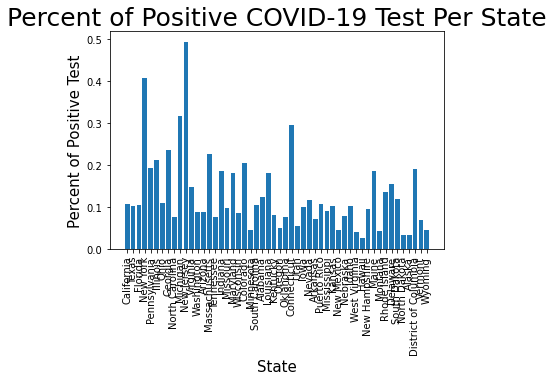

In [42]:
#plt.figure(figsize=[15,10])
plt.bar(cases_per_state['State'],cases_per_state['positive']/cases_per_state['tested'])
plt.xticks(rotation=90)
plt.title('Percent of Positive COVID-19 Test Per State', fontsize=25)
plt.xlabel('State',fontsize=15)
plt.ylabel('Percent of Positive Test', fontsize=15)
plt.show();

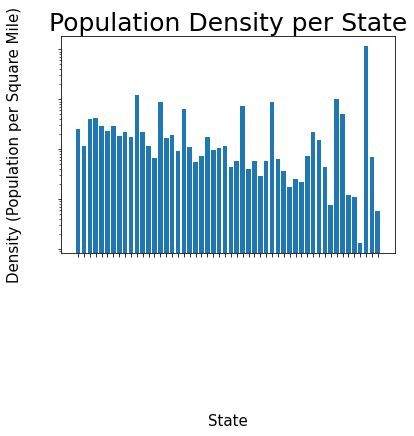

In [43]:
#plt.figure(figsize=[15,10])
plt.bar(cases_per_state['State'],cases_per_state['density'])
plt.yscale('log')
plt.xticks(rotation=90, fontsize=15, c='white')
plt.yticks(fontsize=15, c='white')
plt.title('Population Density per State', fontsize=25)
plt.xlabel('State',fontsize=15)
plt.ylabel('Density (Population per Square Mile)', fontsize=15)
plt.show();

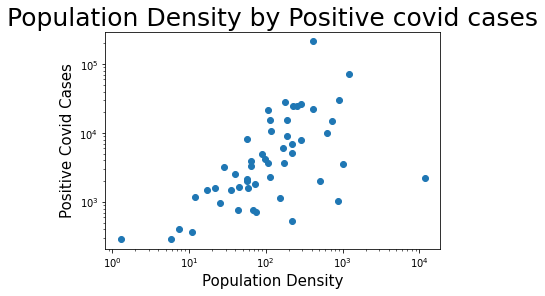

In [44]:
#plt.figure(figsize=[15,10])
plt.scatter(cases_per_state['density'], cases_per_state['positive'])
plt.xscale('log')
plt.yscale('log')
plt.title('Population Density by Positive covid cases', fontsize=25)
plt.xlabel('Population Density',fontsize=15)
plt.ylabel('Positive Covid Cases', fontsize=15)
plt.show();

In [45]:
cases_per_state = pd.merge(sah_df,cases_per_state, on='State')
cases_per_state.head()

,State,Date Announced,Effective Date,rank,Pop,Pop2010,density,state_abbrev,tested,positive,deaths
0,Alabama,2020-04-03,2020-04-04,24,4908621,4785448,96.9221,AL,34077,4241,123
1,Alaska,2020-03-27,2020-03-28,49,734002,713906,1.2863,AK,8664,293,9
2,Arizona,2020-03-30,2020-03-31,14,7378494,6407774,64.9550,AZ,45310,3962,142
3,Arkansas,NaT,NaT,33,3038999,2921978,58.4030,AR,22289,1599,34
4,California,2020-03-19,2020-03-19,1,39937489,37320903,256.3727,CA,227600,24424,821


In [46]:
cases_per_state.sort_values(by='density', ascending=False).head(5)

,State,Date Announced,Effective Date,rank,Pop,Pop2010,density,state_abbrev,tested,positive,deaths
8,District of Columbia,2020-03-30,2020-04-01,50,720687,605085,11814.5410,DC,11525,2197,72
29,New Jersey,2020-03-20,2020-03-21,11,8936574,8799624,1215.1991,NJ,144021,71030,3156
38,Rhode Island,2020-03-28,2020-03-28,45,1056161,1053938,1021.4323,RI,25897,3529,87
20,Massachusetts,2020-03-23,2020-03-24,15,6976597,6566431,894.4355,MA,132023,29918,1108
6,Connecticut,2020-03-20,2020-03-23,29,3563077,3579125,735.8689,CT,50143,14755,868


In [0]:
cases_per_state['case_per_capita'] = cases_per_state['positive']/cases_per_state['Pop']*100

In [48]:
cases_per_state.sort_values(by='density', ascending=False).head(15)

,State,Date Announced,Effective Date,rank,Pop,Pop2010,density,state_abbrev,tested,positive,deaths,case_per_capita
8,District of Columbia,2020-03-30,2020-04-01,50,720687,605085,11814.5410,DC,11525,2197,72,0.304848
29,New Jersey,2020-03-20,2020-03-21,11,8936574,8799624,1215.1991,NJ,144021,71030,3156,0.794824
38,Rhode Island,2020-03-28,2020-03-28,45,1056161,1053938,1021.4323,RI,25897,3529,87,0.334135
20,Massachusetts,2020-03-23,2020-03-24,15,6976597,6566431,894.4355,MA,132023,29918,1108,0.428834
6,Connecticut,2020-03-20,2020-03-23,29,3563077,3579125,735.8689,CT,50143,14755,868,0.414108
19,Maryland,2020-03-30,2020-03-30,19,6083116,5788642,626.6731,MD,55763,10032,349,0.164915
7,Delaware,2020-03-22,2020-03-24,46,982895,899595,504.3073,DE,13102,2014,46,0.204905
31,New York,2020-03-20,2020-03-22,4,19440469,19400080,412.5211,NY,526012,213779,11586,1.099660
9,Florida,2020-04-01,2020-04-03,3,21992985,18845785,410.1256,FL,215521,22519,614,0.102392
34,Ohio,2020-03-22,2020-03-23,7,11747694,11539327,287.5038,OH,71552,7791,361,0.066319


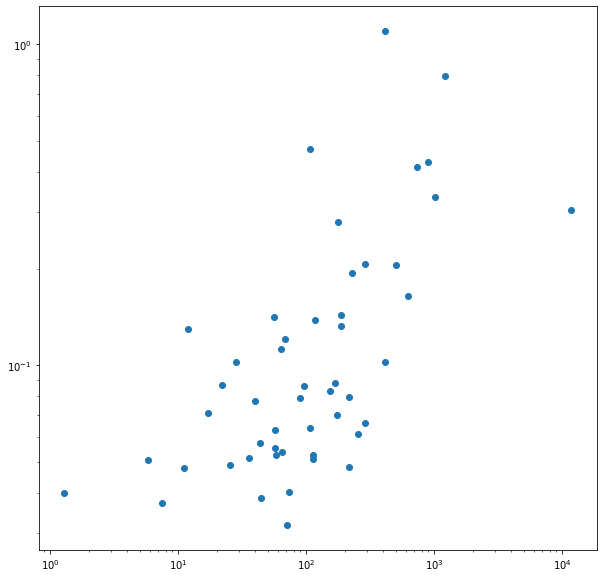

In [49]:
plt.figure(figsize=[10,10])
plt.scatter('density','case_per_capita', data=cases_per_state)
plt.yscale('log')
plt.xscale('log')

We cant add cases per capita to make a predictive model ! We would need something else like ave age per state. or avg amount of people with prior conditions.

### Linear regression test

In [0]:
import statsmodels.api as sm

In [51]:
target = pd.DataFrame(cases_per_state.positive, columns=['positive'])
target.head()

,positive
0,4241
1,293
2,3962
3,1599
4,24424


In [0]:
target['positive']= np.log(target['positive'])

In [53]:
target.head()

,positive
0,8.352554
1,5.680173
2,8.284504
3,7.377134
4,10.103322


In [54]:
X = pd.DataFrame(cases_per_state[['density']])
X['Ones'] = 1
# Why did we put ones again
X.tail()

,density,Ones
45,218.4403,1
46,117.3272,1
47,73.9691,1
48,108.0497,1
49,5.8400,1


In [0]:
X['Ones'] = np.log(X['density'])

In [56]:
X.head()

,density,Ones
0,96.9221,4.573908
1,1.2863,0.251770
2,64.9550,4.173695
3,58.4030,4.067367
4,256.3727,5.546632


In [57]:
model = sm.OLS(target, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               positive   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              687.8
Date:                Tue, 28 Apr 2020   Prob (F-statistic):                    4.66e-36
Time:                        14:35:21   Log-Likelihood:                         -92.800
No. Observations:                  50   AIC:                                      189.6
Df Residuals:                      48   BIC:                                      193.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
density       -0.0008      0.000     -5.799      0.000      -0.001      -0.001
Ones           1.7956      0.050     35.801      0.000       1.695       1.896
==============================================================================
Omnibus:                        3.964   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                3.778
Skew:                           0.182   Prob(JB):                        0.151
Kurtosis:                       4.297   Cond. No.                         382.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
predictions = model.predict(X)

In [59]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X, target)
target_predict = reg.predict(X)

reg.score(X,target)

0.5933153660154173

[[-4.14002943e-04  8.62381384e-01]]
[4.49058337]


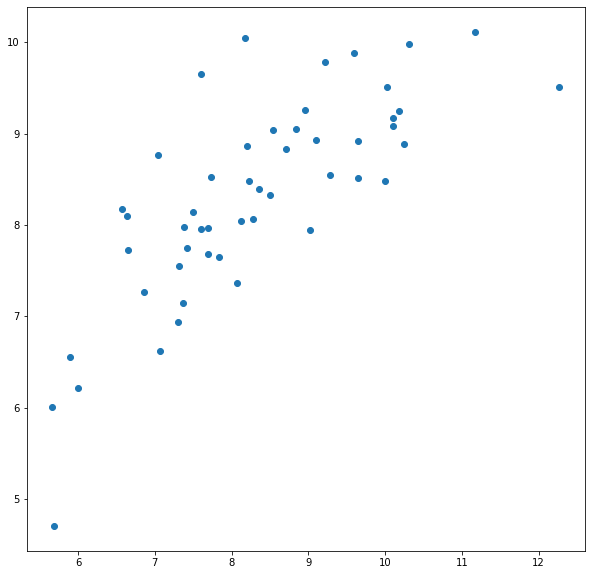

In [60]:
print(reg.coef_)
print(reg.intercept_)

plt.figure(figsize=(10,10));
plt.scatter(target, target_predict);
#plt.axhline(y=0.0, c='red');

## Covid vs Government Intervention

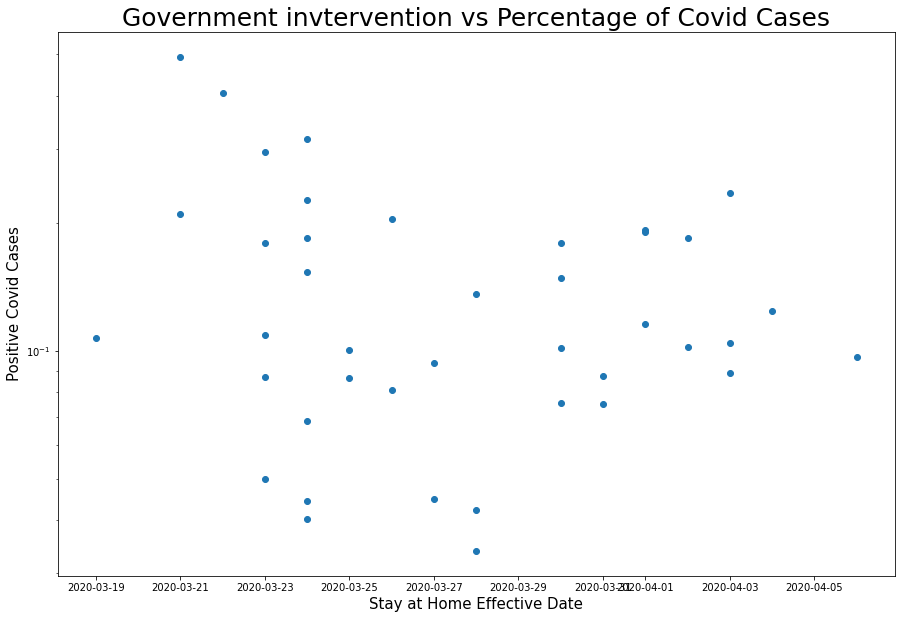

In [61]:
plt.figure(figsize=[15,10])
plt.scatter(cases_per_state['Effective Date'],cases_per_state['positive']/cases_per_state['tested'])
#plt.xscale('log')
plt.yscale('log')
plt.title('Government invtervention vs Percentage of Covid Cases', fontsize=25)
plt.xlabel('Stay at Home Effective Date',fontsize=15)
plt.ylabel('Positive Covid Cases', fontsize=15)
plt.show();

In [62]:
cases_per_state.sort_values('Effective Date', ascending=True).head()

,State,Date Announced,Effective Date,rank,Pop,Pop2010,density,state_abbrev,tested,positive,deaths,case_per_capita
4,California,2020-03-19,2020-03-19,1,39937489,37320903,256.3727,CA,227600,24424,821,0.061156
12,Illinois,2020-03-20,2020-03-21,6,12659682,12840762,228.0243,IL,116929,24593,948,0.194262
29,New Jersey,2020-03-20,2020-03-21,11,8936574,8799624,1215.1991,NJ,144021,71030,3156,0.794824
31,New York,2020-03-20,2020-03-22,4,19440469,19400080,412.5211,NY,526012,213779,11586,1.099660
46,Washington,2020-03-23,2020-03-23,13,7797095,6742902,117.3272,WA,124283,10783,567,0.138295


### Creating loop(maybe function later) to grab select states and view cases over time

In [63]:
c_df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [64]:
print(c_df.shape)
c_df.head()

(48509, 6)


,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [0]:
top_states = ['California','Texas', 'Florida', 'New York', 'Pennsylvania']

In [0]:
select_states = []
#for x in top_states:
for index, row in c_df.iterrows():
  if row['state'] in top_states:
    select_states.append(row)
ss_df = pd.DataFrame(select_states, columns=c_df.columns)      

In [0]:
# def select_state_cases(df,state_col_name, list_of_states):
#   choice_states=[]
#   for x in list_of_states:
#     for index,row in df.iterrows():
#       if row[state_col_name] in list_of_states:
#         choice_states.append(row[state_col_name])
#   cs_df = pd.DataFrame(choice_states, columns=df.columns)

In [68]:
ss_df.head(15)

,date,county,state,fips,cases,deaths
5,2020-01-25,Orange,California,6059.0,1,0
9,2020-01-26,Los Angeles,California,6037.0,1,0
10,2020-01-26,Orange,California,6059.0,1,0
14,2020-01-27,Los Angeles,California,6037.0,1,0
15,2020-01-27,Orange,California,6059.0,1,0
19,2020-01-28,Los Angeles,California,6037.0,1,0
20,2020-01-28,Orange,California,6059.0,1,0
24,2020-01-29,Los Angeles,California,6037.0,1,0
25,2020-01-29,Orange,California,6059.0,1,0
29,2020-01-30,Los Angeles,California,6037.0,1,0


In [0]:
ss_df = pd.DataFrame(ss_df.groupby(['date','state'])['cases'].sum())
ss_df.reset_index(inplace=True)

In [0]:
# ss_df_clean.reset_index(inplace=True)

In [71]:
ss_df.head()

,date,state,cases
0,2020-01-25,California,1
1,2020-01-26,California,2
2,2020-01-27,California,2
3,2020-01-28,California,2
4,2020-01-29,California,2


In [72]:
ss_df.state.unique()

array(['California', 'Texas', 'Florida', 'New York', 'Pennsylvania'],
      dtype=object)

In [0]:
 cali_df = ss_df[ss_df['state'].str.contains('California')].copy(deep=True)
tex_df = ss_df[ss_df['state'].str.contains('Texas')].copy(deep=True)
flo_df = ss_df[ss_df['state'].str.contains('Florida')].copy(deep=True)
ny_df = ss_df[ss_df['state'].str.contains('New York')].copy(deep=True)
penn_df = ss_df[ss_df['state'].str.contains('Pennsylvania')].copy(deep=True)

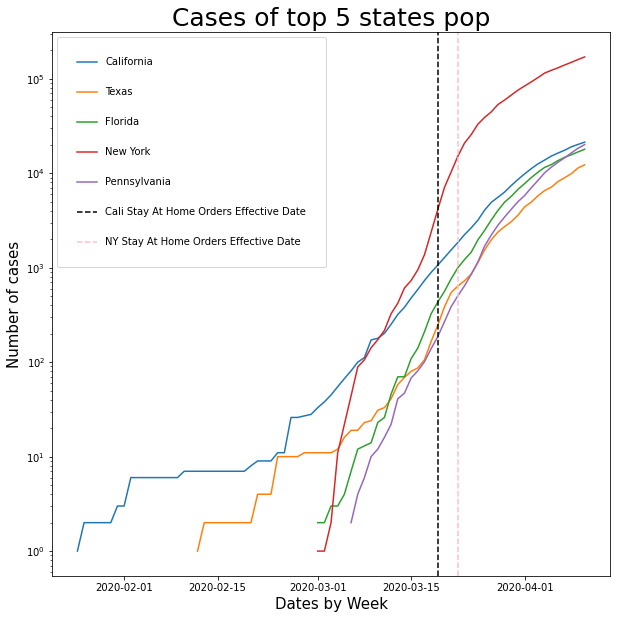

In [74]:
plt.figure(figsize=[10,10])
plt.plot(cali_df['date'],cali_df['cases'], label='California')
plt.plot(tex_df['date'], tex_df['cases'], label='Texas')
plt.plot(flo_df['date'], flo_df['cases'], label='Florida')
plt.plot(ny_df['date'], ny_df['cases'], label='New York')
plt.plot(penn_df['date'], penn_df['cases'], label='Pennsylvania')

plt.yscale('log')
plt.xlabel('Dates by Week', fontsize=15)
plt.ylabel('Number of cases', fontsize=15)
plt.title('Cases of top 5 states pop', fontsize=25)
plt.axvline(pd.to_datetime('2020-3-19'), color='Black', linestyle= '--', label='Cali Stay At Home Orders Effective Date')
plt.axvline(pd.to_datetime('2020-03-22'), color='Pink', linestyle= '--', label='NY Stay At Home Orders Effective Date')
plt.legend(borderpad=2, labelspacing=2,fontsize=10);

In [75]:
sah_df.head(50)

,State,Date Announced,Effective Date
0,Alabama,2020-04-03,2020-04-04
1,Alaska,2020-03-27,2020-03-28
2,Arizona,2020-03-30,2020-03-31
3,Arkansas,NaT,NaT
4,California,2020-03-19,2020-03-19
5,Colorado,2020-03-26,2020-03-26
6,Connecticut,2020-03-20,2020-03-23
7,Delaware,2020-03-22,2020-03-24
8,District of Columbia,2020-03-30,2020-04-01
9,Florida,2020-04-01,2020-04-03


### Government Intervention LRM

In [76]:
int_target = pd.DataFrame(cases_per_state.positive, columns=['positive'])
int_target.head()

,positive
0,4241
1,293
2,3962
3,1599
4,24424


In [0]:
int_target['positive']= np.log(int_target['positive'])

In [0]:
generic_date = pd.to_datetime('2020-03-28')

In [79]:
int_X = pd.DataFrame(cases_per_state['Effective Date'], columns=['Effective Date']).copy(deep=True)
int_X1 = int_X.fillna(generic_date)
int_X1['ones'] = 1
int_X1.head()

,Effective Date,ones
0,2020-04-04,1
1,2020-03-28,1
2,2020-03-31,1
3,2020-03-28,1
4,2020-03-19,1


In [0]:
import datetime as dt
int_X1['Effective Date']=int_X1['Effective Date'].map(dt.datetime.toordinal)

In [81]:
int_X1.min()

Effective Date    737503
ones                   1
dtype: int64

In [0]:
int_X1['Effective Date']= np.log(int_X1['Effective Date']-int_X1['Effective Date'].min()+1)

In [83]:
int_X1.head()

,Effective Date,ones
0,2.833213,1
1,2.302585,1
2,2.564949,1
3,2.302585,1
4,0.000000,1


In [0]:
#print(np.log(int_X1['Effective Date']-int_X1['Effective Date'].min()+1))

In [85]:
int_model = sm.OLS(int_target,int_X1).fit()
int_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               positive   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     6.411
Date:                Tue, 28 Apr 2020   Prob (F-statistic):             0.0147
Time:                        14:35:27   Log-Likelihood:                -85.888
No. Observations:                  50   AIC:                             175.8
Df Residuals:                      48   BIC:                             179.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Effective Date    -0.9138      0.361     -2.532      0.015      -1.640      -0.188
ones              10.2589      0.795     12.908      0.000       8.661      11.857
==============================================================================
Omnibus:                        0.530   Durbin-Watson:                   2.210
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.656
Skew:                           0.109   Prob(JB):                        0.720
Kurtosis:                       2.483   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
int_predictions = int_model.predict(int_X1)

In [87]:
int_reg = linear_model.LinearRegression()
int_reg.fit(int_X1, int_target)
int_target_predict = int_reg.predict(int_X1)

reg.score(int_X1,int_target)

-4.239832155700068

[[-0.91383995  0.        ]]
[10.25890901]


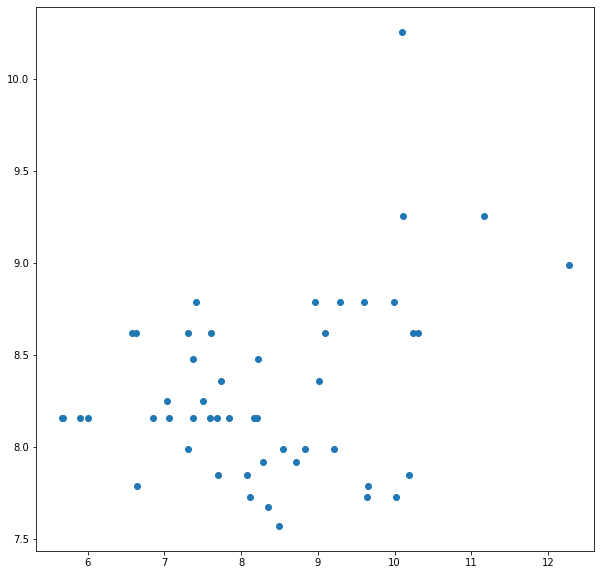

In [88]:
print(int_reg.coef_)
print(int_reg.intercept_)

plt.figure(figsize=(10,10));
plt.scatter(int_target, int_target_predict);

## Hospitals vs total cases - https://www.kff.org/other/state-indicator/total-hospitals

In [0]:
hos_df = pd.read_csv('/content/drive/My Drive/COVID19 Capstone/hospital_raw_data.csv', skiprows=[0,1])
hos_df = hos_df.drop(hos_df.index[0])

In [0]:
hos_df = hos_df.rename(columns= {'Location':'State'})

In [91]:
hos_df.head()

,State,Total Hospitals
1,Alabama,101.0
2,Alaska,21.0
3,Arizona,83.0
4,Arkansas,88.0
5,California,359.0


In [92]:
hos_cases_df = pd.merge(hos_df,cases_per_state, on='State')
hos_cases_df.head()

,State,Total Hospitals,Date Announced,Effective Date,rank,Pop,Pop2010,density,state_abbrev,tested,positive,deaths,case_per_capita
0,Alabama,101.0,2020-04-03,2020-04-04,24,4908621,4785448,96.9221,AL,34077,4241,123,0.086399
1,Alaska,21.0,2020-03-27,2020-03-28,49,734002,713906,1.2863,AK,8664,293,9,0.039918
2,Arizona,83.0,2020-03-30,2020-03-31,14,7378494,6407774,64.9550,AZ,45310,3962,142,0.053697
3,Arkansas,88.0,NaT,NaT,33,3038999,2921978,58.4030,AR,22289,1599,34,0.052616
4,California,359.0,2020-03-19,2020-03-19,1,39937489,37320903,256.3727,CA,227600,24424,821,0.061156


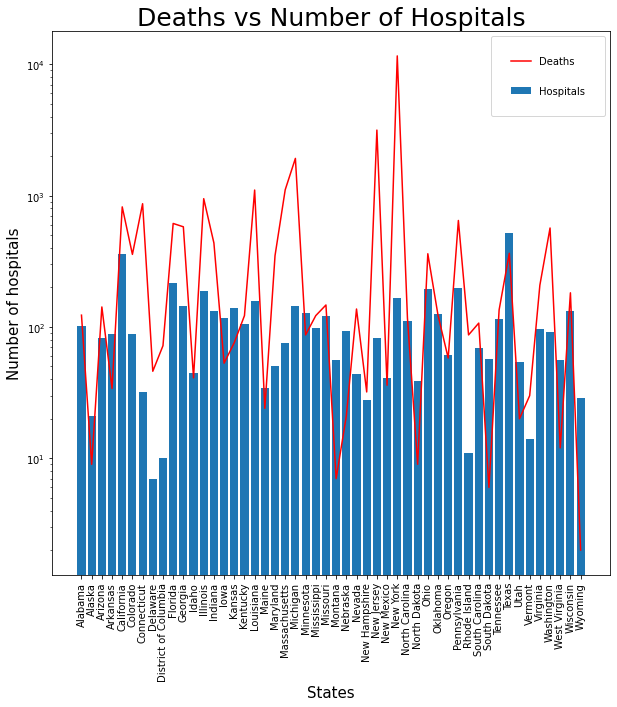

In [93]:
plt.figure(figsize=[10,10])
plt.bar('State','Total Hospitals', data=hos_cases_df, label='Hospitals')
plt.plot(hos_cases_df['State'],hos_cases_df['deaths'], label='Deaths', c='Red')
plt.yscale('log')
plt.xticks(rotation=90)
plt.title('Deaths vs Number of Hospitals',fontsize=25) 
plt.xlabel('States', fontsize=15)
plt.ylabel('Number of hospitals', fontsize=15)
plt.legend(borderpad=2, labelspacing=2,fontsize=10);

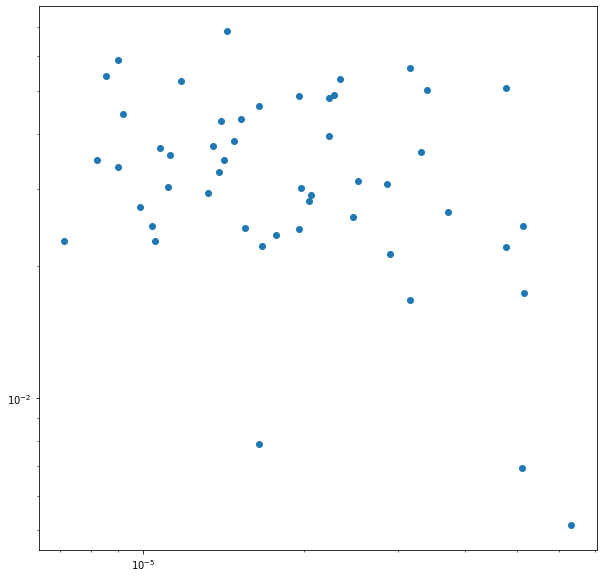

In [94]:
plt.figure(figsize=[10,10])
plt.scatter(hos_cases_df['Total Hospitals']/hos_cases_df['Pop'], hos_cases_df['deaths']/hos_cases_df['positive'])
plt.xscale('log')
plt.yscale('log')

### cases vs hospitals/density LRM

In [95]:
hos_cases_df.head()

,State,Total Hospitals,Date Announced,Effective Date,rank,Pop,Pop2010,density,state_abbrev,tested,positive,deaths,case_per_capita
0,Alabama,101.0,2020-04-03,2020-04-04,24,4908621,4785448,96.9221,AL,34077,4241,123,0.086399
1,Alaska,21.0,2020-03-27,2020-03-28,49,734002,713906,1.2863,AK,8664,293,9,0.039918
2,Arizona,83.0,2020-03-30,2020-03-31,14,7378494,6407774,64.9550,AZ,45310,3962,142,0.053697
3,Arkansas,88.0,NaT,NaT,33,3038999,2921978,58.4030,AR,22289,1599,34,0.052616
4,California,359.0,2020-03-19,2020-03-19,1,39937489,37320903,256.3727,CA,227600,24424,821,0.061156


In [96]:
cases_target = pd.DataFrame(hos_cases_df.positive, columns=['positive'])
cases_target.head()

,positive
0,4241
1,293
2,3962
3,1599
4,24424


In [97]:
hos_X = pd.DataFrame(hos_cases_df[['Total Hospitals','density']])
hos_X.head()

,Total Hospitals,density
0,101.0,96.9221
1,21.0,1.2863
2,83.0,64.9550
3,88.0,58.4030
4,359.0,256.3727


In [98]:
hos_X['density'] = np.log(hos_X['density'])
hos_X['Total Hospitals'] = np.log(hos_X['Total Hospitals'])
hos_X.head()

,Total Hospitals,density
0,4.615121,4.573908
1,3.044522,0.251770
2,4.418841,4.173695
3,4.477337,4.067367
4,5.883322,5.546632


In [99]:
hos_model = sm.OLS(cases_target,hos_X).fit()
hos_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               positive   R-squared (uncentered):                   0.198
Model:                            OLS   Adj. R-squared (uncentered):              0.164
Method:                 Least Squares   F-statistic:                              5.919
Date:                Tue, 28 Apr 2020   Prob (F-statistic):                     0.00504
Time:                        14:35:29   Log-Likelihood:                         -586.67
No. Observations:                  50   AIC:                                      1177.
Df Residuals:                      48   BIC:                                      1181.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Total Hospitals    82.5228   2739.275      0.030      0.976   -5425.159    5590.205
density          2999.1814   2470.139      1.214      0.231   -1967.365    7965.728
==============================================================================
Omnibus:                       98.611   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2631.546
Skew:                           5.657   Prob(JB):                         0.00
Kurtosis:                      36.692   Cond. No.                         5.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
predictions2 = hos_model.predict(hos_X)

In [101]:
reg2 = linear_model.LinearRegression()
reg2.fit(hos_X, cases_target)
target_predict2 = reg2.predict(hos_X)

reg2.score(hos_X,cases_target)

0.155920136687711

[[9083.71378268 6030.60376748]]
[-54504.16638092]


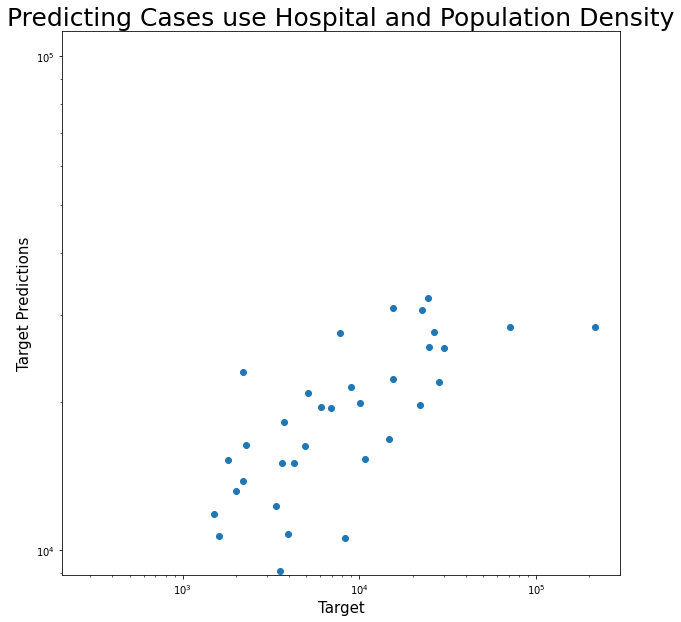

In [102]:
print(reg2.coef_)
print(reg2.intercept_)

plt.figure(figsize=(10,10));
plt.scatter(cases_target, target_predict2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Target', fontsize=15)
plt.ylabel('Target Predictions', fontsize=15)
plt.title('Predicting Cases use Hospital and Population Density', fontsize=25);

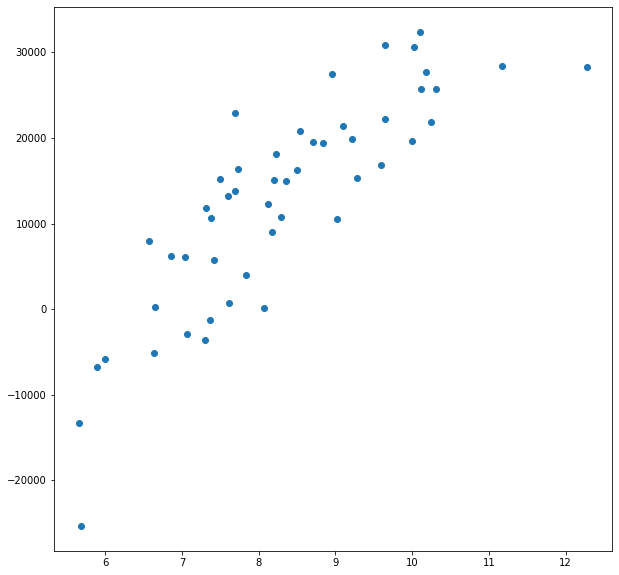

In [103]:
plt.figure(figsize=(10,10))
plt.scatter(np.log(cases_target),(target_predict2))


In [104]:
residuals = pd.DataFrame(np.log(target_predict2)-np.log(cases_target))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [0]:
# print(hos_XA.head())
# cases_targetA.head()

In [0]:
from scipy.optimize import nnls

In [0]:
hos_XA = np.array(hos_X)
cases_targetA = np.array(cases_target)

In [0]:
hos_XB = np.delete(hos_XA, [31], axis=0)

In [109]:
print(hos_XA.shape)
print(hos_XB.shape)

(50, 2)
(49, 2)


In [0]:
cases_targetB = np.reshape(cases_targetA, (1,-1))

In [0]:
cases_targetC = np.delete(cases_targetB,[31])

In [112]:
print(cases_targetB.shape)
print(cases_targetC.shape)

(1, 50)
(49,)


In [0]:
results = nnls(hos_XB,cases_targetC)

In [0]:
results1 = np.dot(hos_XB,results[0])

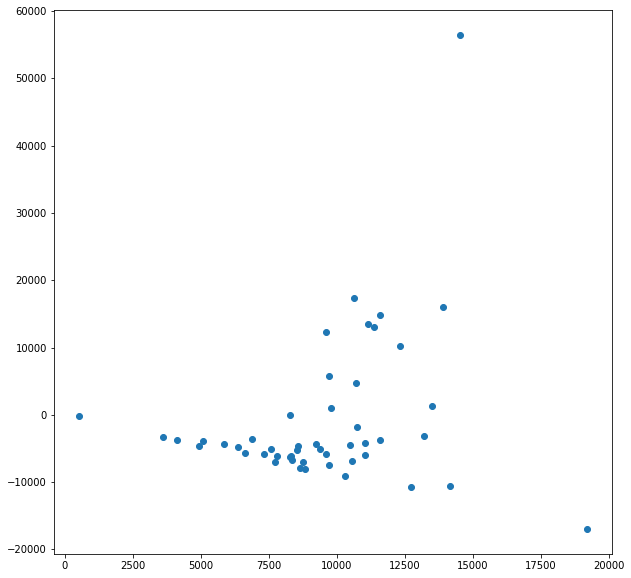

In [115]:
plt.figure(figsize=[10,10])
plt.scatter(results1, cases_targetC-results1)
# plt.yscale('log')
# plt.xscale('log')

In [0]:
# residuals1 = cases_targetB[0]-results1
# residuals1.argmax()

## CDC DATA 

In [0]:
cdc_df = pd.read_csv('/content/drive/My Drive/COVID19 Capstone/CDC_Provisional_Death_Counts_for_Coronavirus_Disease__COVID-19_.csv')

In [118]:
cdc_df.head()

,Data as of,Group,State,Indicator,Start week,End week,All COVID-19 Deaths (U07.1),Deaths from All Causes,Percent of Expected Deaths,All Pneumonia Deaths (J12.0-J18.9),Deaths with Pneumonia and COVID-19 (J12.0-J18.9 and U07.1),All Influenza Deaths (J09-J11)
0,4/17/2020,By week,United States,Total Deaths,2/1/2020,4/18/2020,"17,229","615,428",0.90,"49,013","7,676","5,411"
1,4/17/2020,By week,United States,Week-ending,2/1/2020,2/1/2020,0,"56,645",0.96,"3,648",0,454
2,4/17/2020,By week,United States,Week-ending,2/8/2020,2/8/2020,0,"57,225",0.96,"3,640",0,488
3,4/17/2020,By week,United States,Week-ending,2/15/2020,2/15/2020,0,"56,416",0.96,"3,659",0,509
4,4/17/2020,By week,United States,Week-ending,2/22/2020,2/22/2020,0,"56,120",0.97,"3,518",0,525


In [119]:
cdc_df.Indicator.unique()

array(['Total Deaths', 'Week-ending', 'All ages', 'Under 1 year',
       '1–4 years', '5–14 years', '15–24 years', '25–34 years',
       '35–44 years', '45–54 years', '55–64 years', '65–74 years',
       '75–84 years', '85 years and over', 'Total US', 'Alabama',
       'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'New York City',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto 

In [0]:
age_covid = cdc_df[cdc_df['Indicator'].str.contains('year')].copy(deep=True)
age_covid.reset_index(inplace=True, drop=True)

In [121]:
age_covid.head(20)

,Data as of,Group,State,Indicator,Start week,End week,All COVID-19 Deaths (U07.1),Deaths from All Causes,Percent of Expected Deaths,All Pneumonia Deaths (J12.0-J18.9),Deaths with Pneumonia and COVID-19 (J12.0-J18.9 and U07.1),All Influenza Deaths (J09-J11)
0,4/17/2020,By age,United States,Under 1 year,2/1/2020,4/18/2020,0,"3,224",0.9,28,0,11
1,4/17/2020,By age,United States,1–4 years,2/1/2020,4/18/2020,2,636,0.9,31,2,28
2,4/17/2020,By age,United States,5–14 years,2/1/2020,4/18/2020,1,939,0.9,33,0,38
3,4/17/2020,By age,United States,15–24 years,2/1/2020,4/18/2020,17,"5,474",0.9,110,6,38
4,4/17/2020,By age,United States,25–34 years,2/1/2020,4/18/2020,139,"11,595",0.9,346,57,121
5,4/17/2020,By age,United States,35–44 years,2/1/2020,4/18/2020,351,"16,718",0.9,752,124,192
6,4/17/2020,By age,United States,45–54 years,2/1/2020,4/18/2020,943,"32,207",0.9,"1,974",375,467
7,4/17/2020,By age,United States,55–64 years,2/1/2020,4/18/2020,"2,258","77,835",0.9,"5,877",945,"1,001"
8,4/17/2020,By age,United States,65–74 years,2/1/2020,4/18/2020,"3,829","121,198",0.9,"10,137","1,613","1,191"
9,4/17/2020,By age,United States,75–84 years,2/1/2020,4/18/2020,"4,780","152,251",0.9,"13,612","2,232","1,199"


In [122]:
age_covid['Indicator'].unique()

array(['Under 1 year', '1–4 years', '5–14 years', '15–24 years',
       '25–34 years', '35–44 years', '45–54 years', '55–64 years',
       '65–74 years', '75–84 years', '85 years and over'], dtype=object)

In [123]:
age_covid.dtypes

Data as of                                                     object
Group                                                          object
State                                                          object
Indicator                                                      object
Start week                                                     object
End week                                                       object
All COVID-19 Deaths (U07.1)                                    object
Deaths from All Causes                                         object
Percent of Expected Deaths                                    float64
All Pneumonia Deaths (J12.0-J18.9)                             object
Deaths with Pneumonia and COVID-19 (J12.0-J18.9 and U07.1)     object
All Influenza Deaths (J09-J11)                                 object
dtype: object

In [0]:
age_covid['All COVID-19 Deaths (U07.1)'] = age_covid['All COVID-19 Deaths (U07.1)'].str.replace(',', '')
age_covid['All COVID-19 Deaths (U07.1)'] = age_covid['All COVID-19 Deaths (U07.1)'].astype(int)

In [0]:
age_covid['Deaths with Pneumonia and COVID-19 (J12.0-J18.9 and U07.1)'] = age_covid['Deaths with Pneumonia and COVID-19 (J12.0-J18.9 and U07.1)'].str.replace(',', '')
age_covid['Deaths with Pneumonia and COVID-19 (J12.0-J18.9 and U07.1)'] = age_covid['Deaths with Pneumonia and COVID-19 (J12.0-J18.9 and U07.1)'].astype(int)

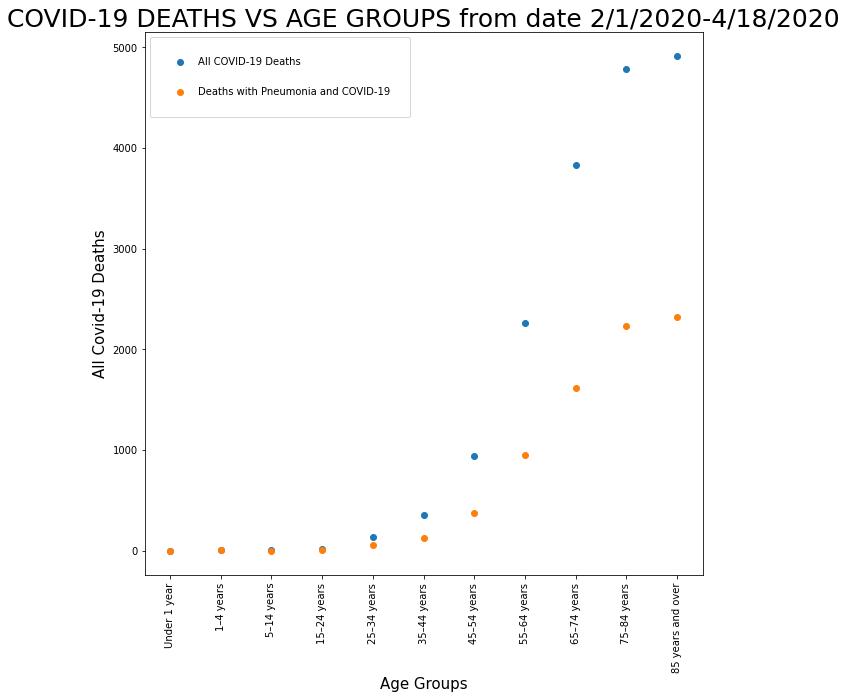

In [126]:
plt.figure(figsize=[10,10])
plt.scatter('Indicator','All COVID-19 Deaths (U07.1)', data=age_covid, label='All COVID-19 Deaths')
plt.scatter('Indicator','Deaths with Pneumonia and COVID-19 (J12.0-J18.9 and U07.1)', data=age_covid,label='Deaths with Pneumonia and COVID-19')
#plt.yscale('log')
plt.xticks(rotation=90)
plt.ylabel('All Covid-19 Deaths', fontsize=15)
plt.xlabel('Age Groups', fontsize=15)
plt.title('COVID-19 DEATHS VS AGE GROUPS from date 2/1/2020-4/18/2020', fontsize=25)
plt.legend(borderpad=2, labelspacing=2,fontsize=10);

Now I want to find the percentage of us population so i can divide the death by covid cases with the percentage of people in that age group in the us

In [0]:
age_group_percent = pd.read_csv('/content/drive/My Drive/COVID19 Capstone/US Population Dist by Age and Sex(2018).csv', skiprows=[0])

In [0]:
age_group_percent = age_group_percent.drop(labels=['Age','Unnamed: 1','Male % of Population','Female % of Population','Total Percent of population'], axis=1)

In [0]:
age_group_percent = age_group_percent.dropna()

In [0]:
age_group_percent['Total Percentage'] = age_group_percent['Total Percentage'].str.replace('%', '')
age_group_percent['Total Percentage'] = age_group_percent['Total Percentage'].astype(float)

In [131]:
age_group_percent.head(50)

,Indicator,Total Percentage
0,Under 1 year,1.17
1,1–4 years,7.33
2,5–14 years,12.56
3,15–24 years,13.14
4,25–34 years,12.66
5,35–44 years,12.62
6,45–54 year,12.73
7,55–64 years,11.77
8,65–74 years,8.64
9,75–84 years,4.68


In [132]:
age_group_percent.Indicator.unique()

array(['Under 1 year', ' 1–4 years', '5–14 years', '15–24 years',
       '25–34 years', '35–44 years', '45–54 year', '55–64 years',
       '65–74 years', '75–84 years', '85 years and over'], dtype=object)

In [0]:
age_group_percent['Indicator'] = age_group_percent['Indicator'].str.strip()

In [134]:
age_group_percent.Indicator.unique()

array(['Under 1 year', '1–4 years', '5–14 years', '15–24 years',
       '25–34 years', '35–44 years', '45–54 year', '55–64 years',
       '65–74 years', '75–84 years', '85 years and over'], dtype=object)

In [0]:
age_covid1 = pd.merge(age_group_percent,age_covid, on='Indicator')

In [136]:
age_covid1.head(20)

,Indicator,Total Percentage,Data as of,Group,State,Start week,End week,All COVID-19 Deaths (U07.1),Deaths from All Causes,Percent of Expected Deaths,All Pneumonia Deaths (J12.0-J18.9),Deaths with Pneumonia and COVID-19 (J12.0-J18.9 and U07.1),All Influenza Deaths (J09-J11)
0,Under 1 year,1.17,4/17/2020,By age,United States,2/1/2020,4/18/2020,0,"3,224",0.9,28,0,11
1,1–4 years,7.33,4/17/2020,By age,United States,2/1/2020,4/18/2020,2,636,0.9,31,2,28
2,5–14 years,12.56,4/17/2020,By age,United States,2/1/2020,4/18/2020,1,939,0.9,33,0,38
3,15–24 years,13.14,4/17/2020,By age,United States,2/1/2020,4/18/2020,17,"5,474",0.9,110,6,38
4,25–34 years,12.66,4/17/2020,By age,United States,2/1/2020,4/18/2020,139,"11,595",0.9,346,57,121
5,35–44 years,12.62,4/17/2020,By age,United States,2/1/2020,4/18/2020,351,"16,718",0.9,752,124,192
6,55–64 years,11.77,4/17/2020,By age,United States,2/1/2020,4/18/2020,2258,"77,835",0.9,"5,877",945,"1,001"
7,65–74 years,8.64,4/17/2020,By age,United States,2/1/2020,4/18/2020,3829,"121,198",0.9,"10,137",1613,"1,191"
8,75–84 years,4.68,4/17/2020,By age,United States,2/1/2020,4/18/2020,4780,"152,251",0.9,"13,612",2232,"1,199"
9,85 years and over,1.99,4/17/2020,By age,United States,2/1/2020,4/18/2020,4909,"193,351",0.9,"16,113",2322,"1,125"


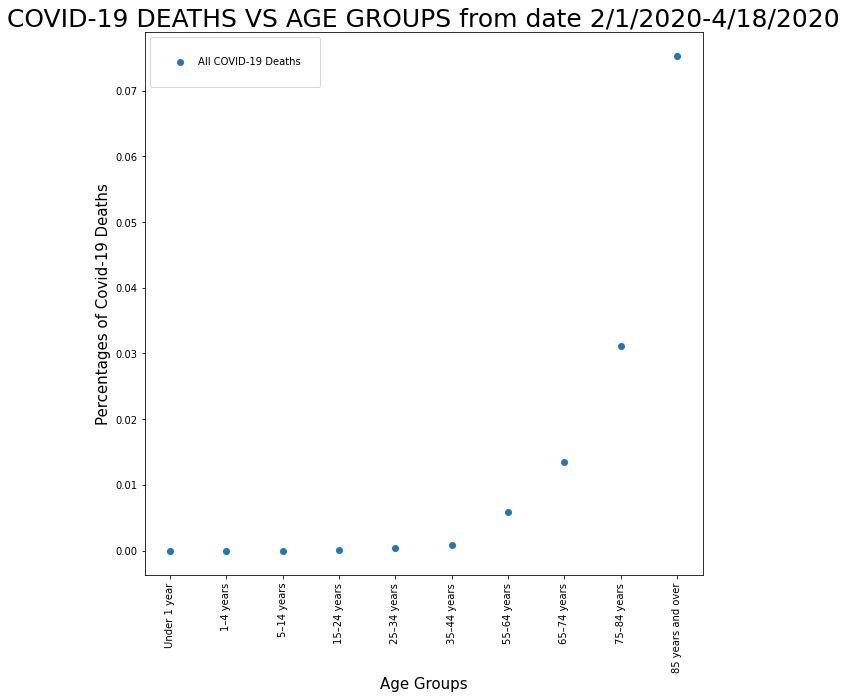

In [149]:
plt.figure(figsize=[10,10])
plt.scatter(age_covid1['Indicator'],100*age_covid1['All COVID-19 Deaths (U07.1)']/(age_covid1['Total Percentage']*328e4), label='All COVID-19 Deaths')
#plt.yscale('log')
plt.xticks(rotation=90)
plt.ylabel('Percentages of Covid-19 Deaths', fontsize=15)
plt.xlabel('Age Groups', fontsize=15)
plt.title('COVID-19 DEATHS VS AGE GROUPS from date 2/1/2020-4/18/2020', fontsize=25)
plt.legend(borderpad=2, labelspacing=2,fontsize=10);

In [0]:
# print(100*age_covid1['All COVID-19 Deaths (U07.1)']/(age_covid1['Total Percentage']*328e4))
# print(np.log(100*age_covid1['All COVID-19 Deaths (U07.1)']/(age_covid1['Total Percentage']*328e4)))
# print(age_covid1['All COVID-19 Deaths (U07.1)']/age_covid1['Total Percentage']/328e8)
# print(age_covid1['All COVID-19 Deaths (U07.1)'])

## Public Transportation 

In [0]:
pub_trans = pd.read_csv('/content/drive/My Drive/COVID19 Capstone/Means of Transportation to Work, age 16 years by State.csv', skiprows=[0])
pub_trans = pub_trans.drop(index=list([11,51,52])).reset_index(drop=True,inplace=False)
pub_trans = pd.DataFrame(pub_trans, columns=['State','Public transportation (excluding taxicab)'])

In [0]:
pub_trans.head()

In [0]:
pub_trans.shape

In [0]:
pub_trans.dtypes

In [0]:
pub_trans['Public transportation (excluding taxicab)'] = pub_trans['Public transportation (excluding taxicab)'].str.replace(',', '')
pub_trans['Public transportation (excluding taxicab)'] = pub_trans['Public transportation (excluding taxicab)'].astype(int)

In [0]:
cases_per_state.head()

In [0]:
pub_trans = pd.merge(pub_trans,cases_per_state, on='State')

In [0]:
pub_trans.head()

In [0]:
pub_trans.dtypes

In [0]:
pub_trans['Population using PubTrans (%)'] = pub_trans['Public transportation (excluding taxicab)']/pub_trans['Pop']*100

In [0]:
pub_trans.head()

In [0]:
pub_trans.case_per_capita.head().sort_values(ascending=False)

In [0]:
plt.figure(figsize=[10,10])

plt.bar(pub_trans['State'], pub_trans['Population using PubTrans (%)'],
        color='b', label='Percent of Population using Public Transportation')
plt.bar(pub_trans['State'], pub_trans['case_per_capita'],
        color='r', label='Cases per Capita')

plt.yscale('log')
plt.title('Percent of Population using Public Transportation vs Cases per capita', fontsize=25)
plt.ylabel('Percent of Population using Public Transportation', fontsize=15)
plt.xticks(rotation=90)
plt.legend(borderpad=2, labelspacing=2,fontsize=10);